<a href="https://colab.research.google.com/github/brunacpg/MPV-Machine-Learning/blob/main/MPV_Ci%C3%AAncia_de_dados_e_Analytcs_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do Problema e Contexto

**Objetivo:** Analisar o sentimento e os tópicos nas avaliações dos clientes da Amazon para entender padrões de satisfação e insatisfação. Esse projeto ajuda a identificar fatores que contribuem para boas ou más avaliações, dando insights sobre melhorias para produtos e serviços.

## Premissas ou Hipóteses:

**Classificação de Sentimentos com Base no Rating:**

Em muitas análises de sentimento em avaliações de produtos, uma prática comum é considerar avaliações com rating >= 4 como positivas e ratings abaixo de 4 como negativas. Isso ajuda a simplificar o problema em uma tarefa de classificação binária (positivo/negativo).

**Premissa:** Avaliações com notas mais altas refletem satisfação, enquanto notas baixas refletem insatisfação.

*   Avaliações com rating >= 4 são classificadas como positivas; rating < 4 como negativas.
*   Produtos com avaliações negativas tendem a ter problemas recorrentes que podem ser identificados.

## Restrições e Condições:

Esta sendo usado apenas o conteúdo textual das avaliações (review_content e review_title), além das classificações (rating), e ignorando outros campos que não sejam diretamente relevantes para a análise de sentimentos.

## Descrição do Dataset:





I) Importando dados de uma url para um dataframe do Kaggle

In [ ]:
import pandas as pd
import os

# Listar os arquivos no diretório baixado para confirmar o nome do arquivo
files = os.listdir(path)
print("Arquivos baixados:", files)

# Carregar o arquivo CSV
df = pd.read_csv(os.path.join(path, 'amazon.csv'), encoding='utf-8', on_bad_lines='skip')



Arquivos baixados: ['amazon.csv']


II)  Verificar a Estrutura dos Dados

In [ ]:
# Exibir as primeiras linhas para inspeção inicial
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


III) Tratar Colunas Específicas

In [ ]:
# Tratamento para as colunas de preços
df['discounted_price'] = df['discounted_price'].replace(r'[^0-9.]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace(r'[^0-9.]', '', regex=True).astype(float)

# Normalização do texto nas colunas de avaliação com UTF-8 diretamente
df['review_title'] = df['review_title'].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore') if isinstance(x, str) else x)
df['review_content'] = df['review_content'].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore') if isinstance(x, str) else x)



IV) Definir o Sentimento Baseado no rating

In [ ]:
# Converter a coluna 'rating' para tipo numérico
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Criar uma coluna 'sentiment' para classificar as avaliações
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')



V) Separação treino e teste

In [ ]:
# Divisão do dataset em um conjunto de treino (80%) e teste (20%)

from sklearn.model_selection import train_test_split

# Separar os dados de entrada (X) e a variável alvo (y)
X = df['review_content']  # Usaremos o conteúdo da avaliação para prever o sentimento
y = df['sentiment']       # Sentimento como variável alvo

# Dividir o dataset em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


VI)  Vetorização do Texto com BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Carregar o tokenizer e o modelo BERT pré-treinado
# 'bert-base-uncased' é a versão de BERT sem diferenciação de maiúsculas/minúsculas
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Função para obter embeddings do BERT para um texto
def get_bert_embeddings(text):
    # Tokenizar o texto e preparar para entrada no modelo BERT
    # return_tensors='pt' retorna os tokens como tensores do PyTorch
    # truncation=True corta o texto se ultrapassar o limite de tokens
    # padding=True adiciona padding para que todas as entradas tenham o mesmo comprimento
    # max_length=512 define o tamanho máximo do texto (BERT suporta até 512 tokens)
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)

    # Passar os tokens pelo modelo BERT para obter os embeddings
    outputs = model(**inputs)

    # Pegar apenas o embedding do token [CLS] (posição 0)
    # O token [CLS] é uma representação do texto inteiro, útil para tarefas de classificação
    embeddings = outputs.last_hidden_state[:, 0, :]  # Usa o embedding do token [CLS]

    # Converter o embedding para um array NumPy para facilitar o uso em ML
    return embeddings.detach().numpy()

# Aplicar o BERT nos dados de treino e teste
# Transformamos cada texto em embeddings usando a função acima
# Isso cria uma lista de vetores numéricos para cada texto de treino e teste
X_train_bert = [get_bert_embeddings(text) for text in X_train]
X_test_bert = [get_bert_embeddings(text) for text in X_test]




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

VII) Converter Embeddings em Matriz

In [ ]:
import numpy as np

# Converter listas de embeddings para arrays NumPy
X_train_bert = np.array(X_train_bert)
X_test_bert = np.array(X_test_bert)

# Exibir as formas para verificar
print("Shape of X_train_bert:", X_train_bert.shape)
print("Shape of X_test_bert:", X_test_bert.shape)


Shape of X_train_bert: (1172, 1, 768)
Shape of X_test_bert: (293, 1, 768)


VIII) Reduzir a Dimensão dos Embeddings: tirar a média dos embeddings ao longo da segunda dimensão (tokens) para que cada texto seja representado por um vetor único.

In [ ]:
import numpy as np

# Tirar a média ao longo da dimensão dos tokens para cada amostra
X_train_bert_mean = np.mean(X_train_bert, axis=1)
X_test_bert_mean = np.mean(X_test_bert, axis=1)

# Verificar as novas formas
print("Shape of X_train_bert_mean:", X_train_bert_mean.shape)
print("Shape of X_test_bert_mean:", X_test_bert_mean.shape)



Shape of X_train_bert_mean: (1172, 768)
Shape of X_test_bert_mean: (293, 768)


IX) Treinamento do Modelo de Classificação

In [ ]:
# Treinar o modelo com os embeddings reduzidos
model.fit(X_train_bert_mean, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_bert_mean)



X) Fazer Previsões no Conjunto de Teste

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_bert_mean)


XI)  Avaliar o Modelo

Accuracy: 0.7781569965870307
Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.18      0.29        74
    positive       0.78      0.98      0.87       219

    accuracy                           0.78       293
   macro avg       0.77      0.58      0.58       293
weighted avg       0.78      0.78      0.72       293



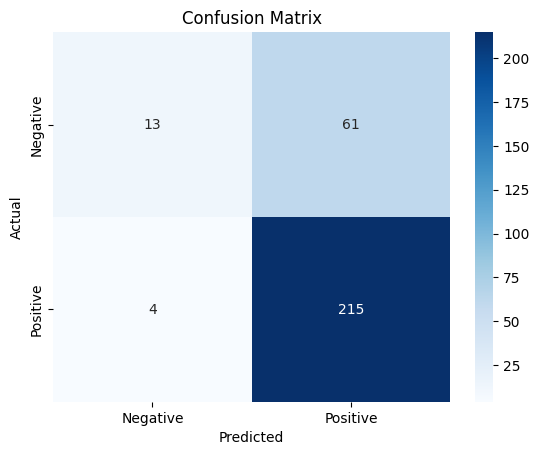

In [ ]:
# Vai ser usado acurácia,
# F1-score e matriz de confusão para avaliar o desempenho do modelo.
# Essas métricas ajudarão a entender o quão bem o modelo está classificando os sentimentos (positivo/negativo).

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Relatório de Classificação (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



XII) Estratégias para Melhorar o Modelo

Balanceamento das Classes:
Como o modelo está mais inclinado a prever a classe positiva, uma abordagem é balancear as classes no conjunto de treino. Aqui estão duas opções:

- Oversampling da Classe Negativa: Aumenta o número de amostras da classe negativa.
- Undersampling da Classe Positiva: Reduz o número de amostras da classe positiva.



XIII) Vamos usar oversampling para aumentar a quantidade de avaliações negativas no conjunto de treino.

In [ ]:
from sklearn.utils import resample

# Separar as classes positivas e negativas no conjunto de treino
X_train_pos = X_train_bert_mean[y_train == 'positive']
y_train_pos = y_train[y_train == 'positive']
X_train_neg = X_train_bert_mean[y_train == 'negative']
y_train_neg = y_train[y_train == 'negative']

# Aplicar oversampling na classe negativa
X_train_neg_upsampled, y_train_neg_upsampled = resample(X_train_neg, y_train_neg,
                                                        replace=True,
                                                        n_samples=len(X_train_pos),
                                                        random_state=42)

# Combinar as amostras upsampled (negativas) com as positivas
X_train_balanced = np.vstack((X_train_pos, X_train_neg_upsampled))
y_train_balanced = np.concatenate((y_train_pos, y_train_neg_upsampled))


XV) Treinar o Modelo com o Conjunto Balanceado

In [ ]:
# Treinar o modelo com o conjunto balanceado
model.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(random_state=42)

XVI)  Fazer Previsões e Avaliar o Modelo

Accuracy: 0.764505119453925
Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.14      0.22        74
    positive       0.77      0.98      0.86       219

    accuracy                           0.76       293
   macro avg       0.72      0.56      0.54       293
weighted avg       0.74      0.76      0.70       293



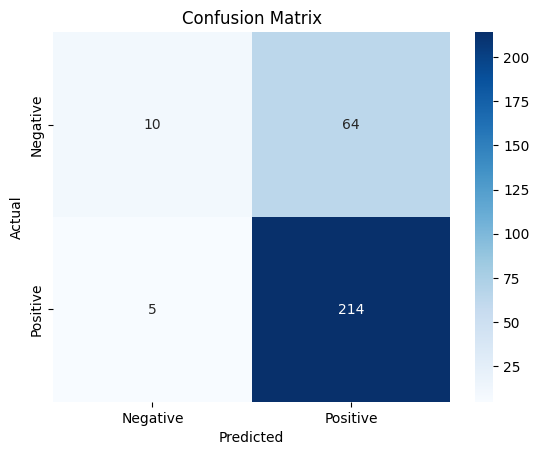

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_balanced = model.predict(X_test_bert_mean)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred_balanced)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# TESTE 2

I) Carregamento e Tratamento Inicial dos Dados

**Objetivo:** Carregar o dataset e realizar os primeiros tratamentos, como conversão de colunas e criação da variável alvo (sentiment).

In [ ]:
import pandas as pd
import os

# Listar os arquivos no diretório baixado para confirmar o nome do arquivo
files = os.listdir(path)
print("Arquivos baixados:", files)

# Carregar o arquivo CSV
df = pd.read_csv(os.path.join(path, 'amazon.csv'), encoding='utf-8', on_bad_lines='skip')
df.head()

# Tratamento para as colunas de preços
df['discounted_price'] = df['discounted_price'].replace(r'[^0-9.]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace(r'[^0-9.]', '', regex=True).astype(float)

# Normalização do texto nas colunas de avaliação com UTF-8 diretamente
df['review_title'] = df['review_title'].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore') if isinstance(x, str) else x)
df['review_content'] = df['review_content'].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore') if isinstance(x, str) else x)

# Converter a coluna 'rating' para tipo numérico
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Criar uma coluna 'sentiment' para classificar as avaliações
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')


Arquivos baixados: ['amazon.csv']


II) Separação dos Dados em Treino e Teste

**Objetivo:** Dividir o dataset em conjuntos de treino e teste para avaliar o desempenho do modelo de forma justa.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar os dados de entrada (X) e a variável alvo (y)
X = df['review_content']  # Usaremos o conteúdo da avaliação para prever o sentimento
y = df['sentiment']       # Sentimento como variável alvo

# Dividir o dataset em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


III) Geração de Embeddings com BERT

**Objetivo:** Usar BERT para transformar o texto em vetores numéricos (embeddings), que capturam o contexto das palavras.

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Carregar o tokenizer e o modelo BERT pré-treinado
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Função para obter embeddings do BERT para um texto
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]  # Usa o embedding do token [CLS]
    return embeddings.detach().numpy()

# Aplicar o BERT nos dados de treino e teste
X_train_bert = [get_bert_embeddings(text) for text in X_train]
X_test_bert = [get_bert_embeddings(text) for text in X_test]


IV) Pré-processamento dos Embeddings

**Objetivo:** Converter os embeddings para um formato adequado para o modelo, reduzindo-os para uma média (representação única por texto).

In [ ]:
import numpy as np

# Converter listas de embeddings para arrays NumPy
X_train_bert = np.array(X_train_bert)
X_test_bert = np.array(X_test_bert)

# Tirar a média ao longo da dimensão dos tokens para cada amostra
X_train_bert_mean = np.mean(X_train_bert, axis=1)
X_test_bert_mean = np.mean(X_test_bert, axis=1)


V) Balanceamento das Classes no Conjunto de Treino

**Objetivo:** Balancear o conjunto de treino usando oversampling na classe negativa para melhorar o desempenho na classe minoritária.

In [ ]:
from sklearn.utils import resample

# Separar as classes positivas e negativas no conjunto de treino
X_train_pos = X_train_bert_mean[y_train == 'positive']
y_train_pos = y_train[y_train == 'positive']
X_train_neg = X_train_bert_mean[y_train == 'negative']
y_train_neg = y_train[y_train == 'negative']

# Aplicar oversampling na classe negativa
X_train_neg_upsampled, y_train_neg_upsampled = resample(X_train_neg, y_train_neg, replace=True, n_samples=len(X_train_pos), random_state=42)

# Combinar as amostras upsampled (negativas) com as positivas
X_train_balanced = np.vstack((X_train_pos, X_train_neg_upsampled))
y_train_balanced = np.concatenate((y_train_pos, y_train_neg_upsampled))


VI) Treinamento e Avaliação do Modelo

**Objetivo:** Treinar o modelo usando o conjunto balanceado e avaliar o desempenho com as métricas padrão.

Accuracy: 0.7679180887372014
Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.16      0.26        74
    positive       0.77      0.97      0.86       219

    accuracy                           0.77       293
   macro avg       0.72      0.57      0.56       293
weighted avg       0.75      0.77      0.71       293



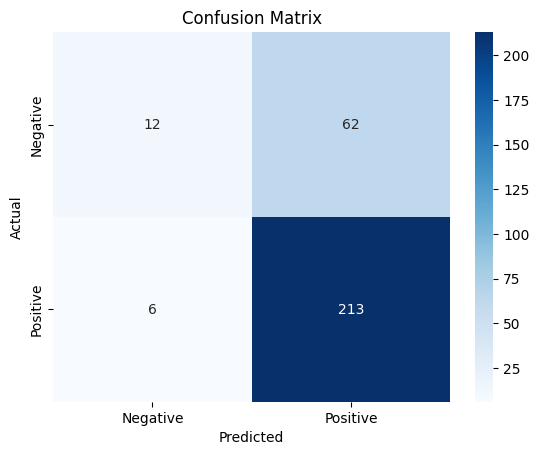

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar o modelo de Random Forest com class_weight balanceado
model_rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)

# Treinar o modelo com o conjunto balanceado
model_rf.fit(X_train_balanced, y_train_balanced)

# Fazer previsões no conjunto de teste
y_pred_balanced = model_rf.predict(X_test_bert_mean)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred_balanced)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


VII) Implementar o Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir o modelo
model_rf = RandomForestClassifier(random_state=42)

# Definir o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # Mantendo o balanceamento das classes
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)

# Treinar o GridSearchCV no conjunto balanceado
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhor modelo e hiperparâmetros
best_model = grid_search.best_estimator_
print("Melhores Hiperparâmetros:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhores Hiperparâmetros: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
